In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'C://Users/navee/Desktop/Bank_data.csv')

In [6]:
df.head()

,Unnamed: 0,App_ID,balance,Bank,File_ID,Has_Password,IFSC,debit,credit,date,...,BRANCH,CENTRE,DISTRICT,STATE,IMPS,RTGS,CITY,NEFT,MICR,UPI
0,0,7663,9769.97,hdfc,199122,True,HDFC0009061,-240.0,0.0,10-10-2018,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
1,1,7663,22586.09,hdfc,199122,True,HDFC0009061,-1800.0,0.0,29-09-2018,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
2,2,7663,20586.09,hdfc,199122,True,HDFC0009061,-2000.0,0.0,30-09-2018,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
3,3,7663,20699.09,hdfc,199122,True,HDFC0009061,0.0,113.0,30-09-2018,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True
4,4,7663,10699.09,hdfc,199122,True,HDFC0009061,-10000.0,0.0,01-10-2018,...,MALUR,KOLAR,KOLAR,KARNATAKA,True,True,MALUR,True,563240452.0,True


In [174]:
df.describe()

,Unnamed: 0,App_ID,balance,File_ID,debit,credit,month,day,MICR
count,174730.000000,174730.000000,1.747300e+05,174730.000000,1.747300e+05,1.747300e+05,174730.000000,174730.000000,1.747300e+05
mean,87364.500000,47365.863979,1.356464e+04,375209.351147,-2.130683e+03,3.535474e+06,6.479082,2.599239,4.174976e+08
std,50440.350605,33155.795560,4.175491e+04,293224.950875,1.159251e+04,1.554609e+08,3.406166,1.912101,1.917270e+08
min,0.000000,14.000000,-5.125598e+05,22895.000000,-1.179000e+06,0.000000e+00,1.000000,0.000000,1.002293e+08
25%,43682.250000,18551.000000,4.154900e+02,125879.000000,-1.000000e+03,0.000000e+00,4.000000,1.000000,3.022110e+08
50%,87364.500000,42670.000000,3.145585e+03,267298.000000,-1.000000e+02,0.000000e+00,7.000000,3.000000,4.224850e+08
75%,131046.750000,78666.000000,1.188137e+04,667010.000000,0.000000e+00,3.000000e+02,9.000000,4.000000,5.602290e+08
max,174729.000000,121802.000000,1.524903e+06,949917.000000,0.000000e+00,1.192034e+10,12.000000,6.000000,8.544852e+08


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174730 entries, 0 to 174729
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             174730 non-null  int64  
 1   App_ID                 174730 non-null  int64  
 2   balance                174730 non-null  float64
 3   Bank                   174730 non-null  object 
 4   File_ID                174730 non-null  int64  
 5   Has_Password           174730 non-null  bool   
 6   IFSC                   174730 non-null  object 
 7   debit                  174730 non-null  float64
 8   credit                 174730 non-null  float64
 9   date                   174730 non-null  object 
 10  month                  174730 non-null  int64  
 11  day                    174730 non-null  int64  
 12  dayname                174730 non-null  object 
 13  time                   174730 non-null  object 
 14  Transaction_type       174730 non-nu

In [ ]:
# most of the featues are categorical with high cardinality, few are numerical and boolean.

In [ ]:
# using klib for eda to study the correlation and the distribution of various features.

In [3]:
!pip install klib

In [4]:
import klib

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

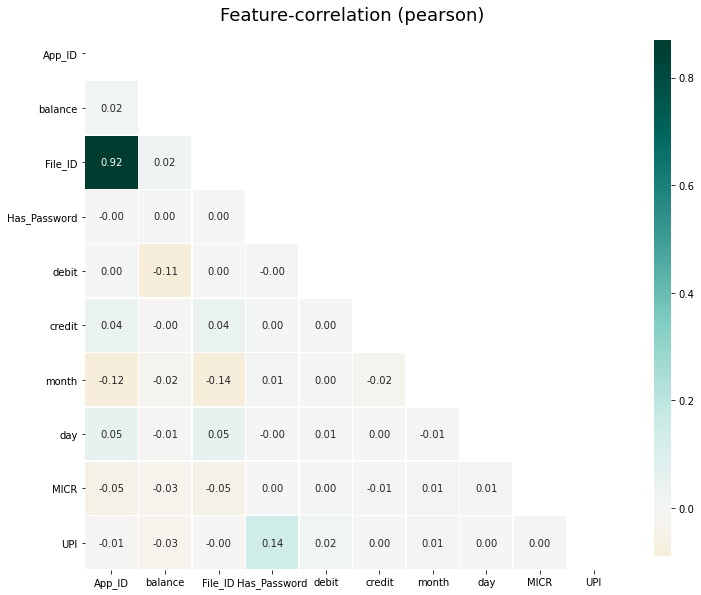

In [11]:
df1=df[['App_ID','balance','File_ID','Has_Password','debit','credit','month','day','MICR','UPI']]
klib.corr_plot(df1)

In [ ]:
# As we can see that the app_id is highly correlated with the file_id we can remove one of them

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot:xlabel='MICR', ylabel='Density'>

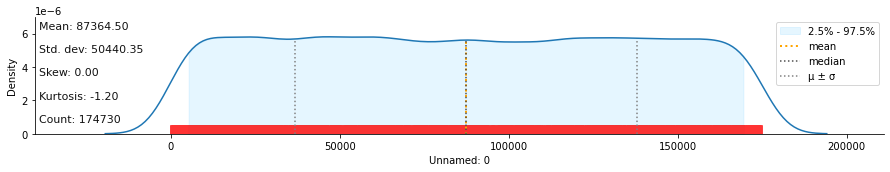

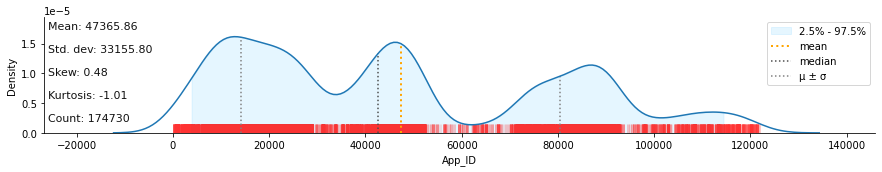

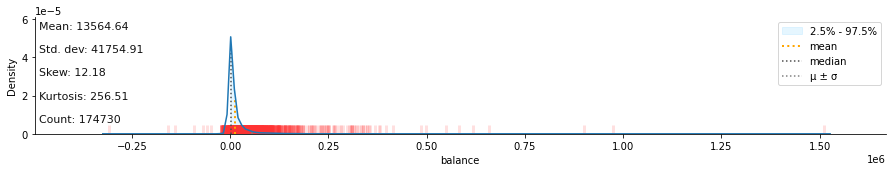

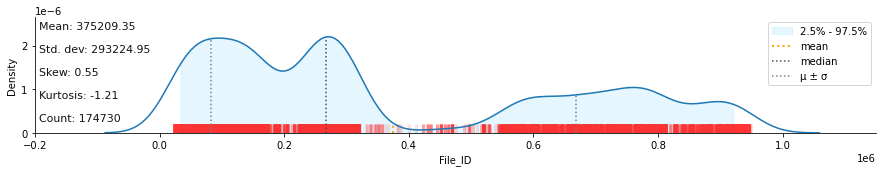

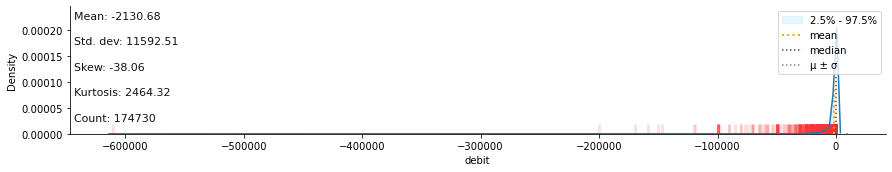

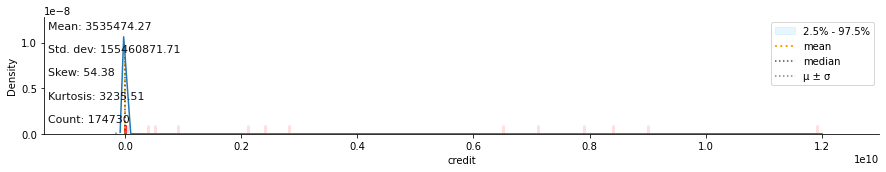

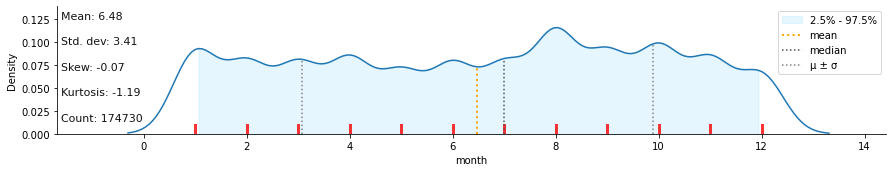

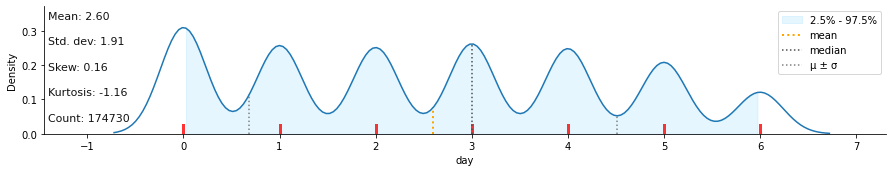

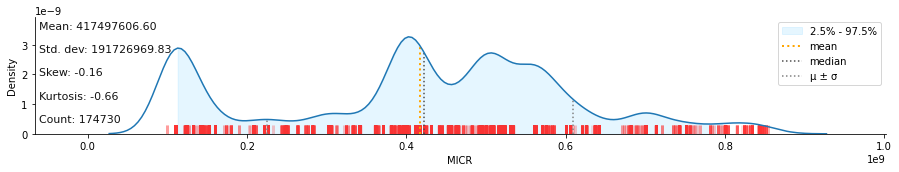

In [12]:
klib.dist_plot(df)

In [ ]:
# from the distribution plot we can see that the balance,credit,debit have very low variance and steep histplot, while others have large variance.

In [24]:
df.loc[np.where(df['balance']==max(df.balance))][['App_ID','balance','STATE']]

,App_ID,balance,STATE
68900,89422,1524903.4,MAHARASHTRA


In [ ]:
# hence the app_ID - 68900 and 89422 have the highest balance in the whole dataset, he belong to Maharashtra

In [25]:
df.loc[np.where(df['balance']==min(df.balance))][['App_ID','balance','STATE']]

,App_ID,balance,STATE
84994,99779,-512559.83,JHARKHAND


In [ ]:
# hence the app_ID - 84994 and 99779 have the lowest balance (he has taken a loan of 5 lakh approx from bank) 
# in the whole dataset and he belong to Jhaerkhand

In [26]:
df.groupby('App_ID').mean()

,Unnamed: 0,balance,File_ID,Has_Password,debit,credit,month,day,IMPS,RTGS,NEFT,MICR,UPI
App_ID,,,,,,,,,,,,,
14,92658.0,0.330000,82539.0,1.0,0.000000,0.330000,9.0,5.000000,1.0,1.0,1.0,110485124.0,1.0
96,161694.0,-108.290000,139937.0,1.0,-270.000000,190.000000,10.0,2.200000,1.0,1.0,1.0,380240045.0,1.0
118,159677.0,3859.302000,84320.0,1.0,-1581.585333,1582.452000,6.8,1.933333,1.0,1.0,1.0,600485017.0,1.0
139,171048.5,270549.443784,293706.0,1.0,-7216.345135,6382.583378,9.0,2.851351,1.0,1.0,1.0,110240177.0,1.0
154,122701.0,8358.227931,52401.0,1.0,-2485.023793,2456.406897,2.0,2.000000,1.0,1.0,1.0,110211005.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121376,13231.0,1217.522857,946713.0,1.0,-285.580000,285.714286,12.0,3.285714,1.0,1.0,1.0,411485021.0,1.0
121426,98368.5,750.000000,946950.0,1.0,-500.000000,500.000000,8.0,3.750000,1.0,1.0,1.0,533485004.0,1.0
121592,98449.0,1497.242308,947699.0,1.0,-693.507692,701.386923,5.0,3.338462,1.0,1.0,1.0,500485028.0,1.0


In [28]:
df.groupby('STATE').mean()

,Unnamed: 0,App_ID,balance,File_ID,Has_Password,debit,credit,month,day,IMPS,RTGS,NEFT,MICR,UPI
STATE,,,,,,,,,,,,,,
ANDHRA PRADESH,87137.570209,47258.039756,12371.058588,362064.163725,1.000000,-1988.024878,1.537634e+06,6.828937,2.632889,1.0,1.0,1.0,5.084363e+08,1.000000
ARUNACHAL PRADESH,129737.723881,40932.791045,23590.093358,235337.865672,1.000000,-6311.501269,6.299492e+03,1.880597,2.455224,1.0,1.0,1.0,7.912387e+08,1.000000
ASSAM,117736.702703,50314.745174,15929.894826,353455.127413,1.000000,-3328.930541,2.691857e+03,6.675676,2.563707,1.0,1.0,1.0,7.395336e+08,1.000000
BIHAR,91499.740139,43934.652552,17497.249861,361660.113979,1.000000,-2668.043567,2.475522e+05,5.766241,2.683875,1.0,1.0,1.0,8.135852e+08,0.982599
CHANDIGARH,105672.523925,60543.214112,20693.483990,464476.774534,1.000000,-2431.981857,1.743473e+03,5.549067,2.317924,1.0,1.0,1.0,2.957208e+08,1.000000
CHHATTISGARH,115583.836283,42034.117994,15497.526622,287546.932153,1.000000,-2949.549240,3.094904e+03,7.199115,2.728614,1.0,1.0,1.0,4.803048e+08,1.000000
DADRA AND NAGAR HAVELI AND DAMAN AND DIU,81782.744828,56346.498851,8863.377402,467090.820690,1.000000,-2086.738759,2.235662e+03,7.151724,2.512644,1.0,1.0,1.0,3.962256e+08,1.000000
DELHI,84654.433656,45641.489793,11296.513671,349551.619124,0.999060,-2010.438615,6.712932e+06,6.848375,2.461859,1.0,1.0,1.0,1.103321e+08,0.999060
GOA,98094.874477,61814.284519,4877.558243,508458.184100,1.000000,-741.721339,7.701135e+02,4.451883,2.326360,1.0,1.0,1.0,4.032822e+08,1.000000


In [ ]:
# Using folium and geopy for generating the map to understand the state in which banks are present.

In [29]:
!pip install folium

In [30]:
!pip install geopy

In [178]:
import folium
from geopy.geocoders import Nominatim

In [179]:
geolocator=Nominatim(user_agent='nav')

In [39]:
places=df['STATE'].unique()

In [ ]:
# There is a map.html file created which shows the latitude and longitude of the state in whih the bank is present we can 
# similarly use the district and the city data to plot the map.

In [41]:
m=folium.Map(location=[20.5937, 78.9629],zoom_start=5)
for i in places:
    place=geolocator.geocode(i)
    tooltip=f"{i}"
    folium.Marker([place.latitude,place.longitude],popup=f"<strong>{i}</strong>",tooltip=tooltip,icon=folium.Icon(color='green')).add_to(m)
    
m.save('map.html')

In [44]:
df.columns

Index(['Unnamed: 0', 'App_ID', 'balance', 'Bank', 'File_ID', 'Has_Password',
       'IFSC', 'debit', 'credit', 'date', 'month', 'day', 'dayname', 'time',
       'Transaction_type', 'Bank_statement_from', 'Bank_statement_to',
       'Bank_statement_period', 'BRANCH', 'CENTRE', 'DISTRICT', 'STATE',
       'IMPS', 'RTGS', 'CITY', 'NEFT', 'MICR', 'UPI'],
      dtype='object')

In [47]:
import seaborn as sns

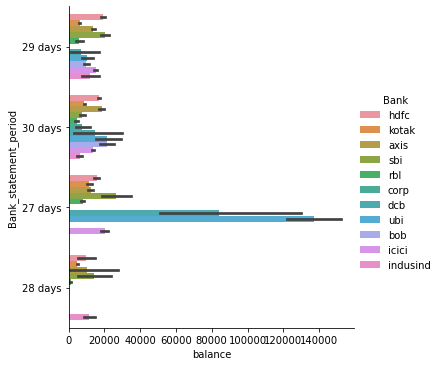

In [184]:
import matplotlib.pyplot as plt
sns.catplot(data=df,y='Bank_statement_period',x='balance',kind='bar',hue='Bank')

In [ ]:
# The graph shows that the large balance transactions are completed nuch faster than the low and moderate balance transactions.
# the ubi and dcb bank provide these services other banks treat all the transactions similarly and proceed with standard processing time.

In [66]:
data=df.drop(columns=['Unnamed: 0','File_ID','IFSC','date','dayname','time','Bank_statement_from','Bank_statement_to','CENTRE','DISTRICT','IMPS','RTGS','MICR'])

In [67]:
data.head()

,App_ID,balance,Bank,Has_Password,debit,credit,month,day,Transaction_type,Bank_statement_period,BRANCH,STATE,CITY,NEFT,UPI
0,7663,9769.97,hdfc,True,-240.0,0.0,10,2,APY,29 days,MALUR,KARNATAKA,MALUR,True,True
1,7663,22586.09,hdfc,True,-1800.0,0.0,9,5,UPI,29 days,MALUR,KARNATAKA,MALUR,True,True
2,7663,20586.09,hdfc,True,-2000.0,0.0,9,6,NWD,29 days,MALUR,KARNATAKA,MALUR,True,True
3,7663,20699.09,hdfc,True,0.0,113.0,9,6,CRE,29 days,MALUR,KARNATAKA,MALUR,True,True
4,7663,10699.09,hdfc,True,-10000.0,0.0,10,0,NWD,29 days,MALUR,KARNATAKA,MALUR,True,True


In [ ]:
# as many of the feature have very high cardinality we can replace those value by the frequency of their occurance in the dataset

In [69]:
x=data.Transaction_type.value_counts().to_dict()

In [70]:
data.Transaction_type=data.Transaction_type.map(x)

In [74]:
x=data.STATE.value_counts().to_dict()
data.STATE=data.STATE.map(x)

In [78]:
x=data.BRANCH.value_counts().to_dict()
data.BRANCH=data.BRANCH.map(x)

In [79]:
data.head()

,App_ID,balance,Bank,Has_Password,debit,credit,month,day,Transaction_type,Bank_statement_period,BRANCH,STATE,CITY,NEFT,UPI
0,7663,9769.97,hdfc,True,-240.0,0.0,10,2,405,29 days,247,19766,MALUR,True,True
1,7663,22586.09,hdfc,True,-1800.0,0.0,9,5,54981,29 days,247,19766,MALUR,True,True
2,7663,20586.09,hdfc,True,-2000.0,0.0,9,6,3972,29 days,247,19766,MALUR,True,True
3,7663,20699.09,hdfc,True,0.0,113.0,9,6,421,29 days,247,19766,MALUR,True,True
4,7663,10699.09,hdfc,True,-10000.0,0.0,10,0,3972,29 days,247,19766,MALUR,True,True


In [82]:
data.drop(columns=['NEFT'],inplace=True)

In [87]:
x=data.CITY.value_counts().to_dict()
data.CITY=data.CITY.map(x)

In [110]:
data.head()

,App_ID,balance,Bank,Has_Password,debit,credit,month,day,Transaction_type,Bank_statement_period,BRANCH,STATE,CITY,UPI
0,7663,9769.97,hdfc,1,-240.0,0.0,10,2,405,29 days,247,19766,247,1
1,7663,22586.09,hdfc,1,-1800.0,0.0,9,5,54981,29 days,247,19766,247,1
2,7663,20586.09,hdfc,1,-2000.0,0.0,9,6,3972,29 days,247,19766,247,1
3,7663,20699.09,hdfc,1,0.0,113.0,9,6,421,29 days,247,19766,247,1
4,7663,10699.09,hdfc,1,-10000.0,0.0,10,0,3972,29 days,247,19766,247,1


In [109]:
data.Has_Password=data.Has_Password.map({True:1,False:0})
data.UPI=data.UPI.map({True:1,False:0})

In [ ]:
# implementing pipeline for the label encoding and scaling of the data

In [121]:
numerical_features = data.select_dtypes(exclude='object').columns

In [93]:
categorical_features=data.select_dtypes(include='object')

In [122]:
binary_features=['Bank_statement_period']

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder,StandardScaler

In [ ]:
# implementing a custom labelencoder as there are more than 2 features in a given column.

In [132]:
from sklearn.preprocessing import LabelEncoder
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [133]:
numerical_transformer=Pipeline(steps=[('numerical',StandardScaler())])
nominal_transformer=Pipeline(steps=[('nominal',OneHotEncoder())])
ordinal_transformer=Pipeline(steps=[('Label',MultiColumnLabelEncoder())])

In [134]:
preprocessor1=ColumnTransformer(transformers=[
      ('T1',ordinal_transformer,binary_features),
      ('T2',numerical_transformer,numerical_features),
      ('T3',nominal_transformer,binary_features)
      ],sparse_threshold=0)

In [135]:
X=data.drop(columns=['Bank'])
y=data.Bank

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [137]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [138]:
model=Pipeline(steps=[('preprocessor1',preprocessor1),
                ('model',model)
                ])

In [139]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('T1',
                                                  Pipeline(steps=[('Label',
                                                                   <__main__.MultiColumnLabelEncoder object at 0x0000013FF3884AF0>)]),
                                                  ['Bank_statement_period']),
                                                 ('T2',
                                                  Pipeline(steps=[('numerical',
                                                                   StandardScaler())]),
                                                  Index(['App_ID', 'balance', 'Has_Password', 'debit', 'credit', 'month', 'day',
       'Transaction_type', 'BRANCH', 'STATE', 'CITY', 'UPI'],
      dtype='object')),
                                                 ('T3',
                                                  Pipeline(steps=[('nom

In [140]:
y_pred=model.predict(X_test)

In [ ]:
"""The various type of classification metrics used are - 
  1. accuracy
  2. precision
  3. recall
  4. F1 score
  5. roc_curve
  6. auc_curve"""

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,f1_score,precision_score,recall_score,roc_auc_score,plot_roc_curve

In [142]:
accuracy_score(y_test,y_pred)

0.9869799118640188

In [143]:
confusion_matrix(y_test,y_pred)

array([[ 2797,     0,     0,     0,   106,    14,     0,    22,     0,
            0,     0],
       [    0,   221,     0,     0,    17,     2,     0,     4,     0,
            0,     0],
       [    0,     0,     2,     0,     1,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0,    15,     6,     0,     0,     0,     0,
            0,     0],
       [    1,     0,     0,     0, 12373,    15,     0,    34,     0,
            0,     0],
       [    3,     0,     0,     0,    79,  7197,     0,    13,     0,
            0,     0],
       [    0,     0,     0,     0,     0,     0,    67,     0,     0,
            0,     0],
       [    1,     0,     0,     0,   105,    20,     0, 11180,     0,
            0,     0],
       [    2,     0,     0,     0,     3,     0,     0,     7,   446,
            0,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
          170,     0],
       [    0,     0,     0,     0,     0,     0,     0,    

In [170]:
f1_score(y_test,y_pred,average='macro')

0.9555334559059143

In [ ]:
# THis conclude that our model is performing well on the test as well as the test dataset, there is no sudden or large difference in both the scores.